In [2]:
import numpy as np
import pandas
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [3]:
#masukin data1
data1=pandas.read_csv('D:\\SKRIPSI\\data\\data_praproses\\jamu_herbs.csv', sep=',')
#masukin data2
data2=pandas.read_csv('D:\\SKRIPSI\\data\\data_praproses\\jamu_class.csv', sep=',')

In [4]:
data_1 = data1.drop('IDJamu',axis=1)
data_2 = data2.drop('Jamu ID',axis=1)
data_1['Kelas']=data_2['Class of Diseases']
data_temp  = data_1[data_1['Kelas'] != 5]
X = data_temp.drop('Kelas', axis=1).values
y = data_temp['Kelas'].values

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
val_loss_cv = []
val_acc_cv = []
for train_index, test_index in sss.split(X,y):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    model = Sequential()
    model.add(Dense(input_dim=X_train.shape[1], units=128,
                     kernel_initializer='normal', bias_initializer='zeros'))
    model.add(Activation('relu'))

    for i in range(0, 6):
        model.add(Dense(units=128, kernel_initializer='normal',
                         bias_initializer='zeros'))
        model.add(Activation('relu'))
        model.add(Dropout(.15))

    model.add(Dense(units=19))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train,batch_size=24,epochs=30,verbose=1,validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=1)
    val_loss_cv.append(score[0])
    val_acc_cv.append(score[1])
    predict = model.predict_classes(X_test)

Train on 2712 samples, validate on 302 samples
Epoch 1/30
2712/2712 [==============================] - 1s 429us/step - loss: 2.3127 - acc: 0.2094 - val_loss: 2.0806 - val_acc: 0.2450
Epoch 2/30
2712/2712 [==============================] - 1s 214us/step - loss: 2.0237 - acc: 0.2607 - val_loss: 1.8572 - val_acc: 0.3642
Epoch 3/30
2712/2712 [==============================] - 1s 217us/step - loss: 1.7471 - acc: 0.3606 - val_loss: 1.7677 - val_acc: 0.3543
Epoch 4/30
2712/2712 [==============================] - 1s 217us/step - loss: 1.5447 - acc: 0.4517 - val_loss: 1.6399 - val_acc: 0.5066
Epoch 5/30
2712/2712 [==============================] - 1s 248us/step - loss: 1.3252 - acc: 0.5520 - val_loss: 1.5337 - val_acc: 0.5464
Epoch 6/30
2712/2712 [==============================] - 1s 218us/step - loss: 1.1549 - acc: 0.6213 - val_loss: 1.5309 - val_acc: 0.5828
Epoch 7/30
2712/2712 [==============================] - 1s 214us/step - loss: 1.0329 - acc: 0.6711 - val_loss: 1.4718 - val_acc: 0.6192
E

In [6]:
#nilai akurasi prediksi
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.6225165562913907

In [7]:
#hasil prediksi
predict

array([11, 14, 11, 14,  6, 17,  1, 15, 15, 14, 11, 11, 16,  6, 18,  8,  6,
       15, 11,  3,  3,  1, 14, 11,  1,  3, 11, 15, 14,  2,  1, 16, 14, 15,
       15,  3,  6,  8, 14,  3, 11,  1,  6, 11, 14,  6, 11, 15, 14, 14,  3,
        3,  6, 15,  3, 16, 11, 11,  1,  3, 14, 14,  6, 11,  3, 14, 14, 11,
       14, 11, 14,  9, 15, 15, 14, 15,  3, 11,  3,  3, 15, 15, 14,  3,  6,
       14,  3,  3,  3, 14, 14, 15, 11, 14, 14, 11,  2,  3, 14,  3, 14, 17,
       14, 11, 11, 11,  6,  6, 14, 11,  2,  1, 14, 15, 13, 14,  1,  3,  3,
       14,  3, 15, 11,  6,  1, 16,  6, 11,  3, 15, 11,  2,  3, 14,  9, 11,
        6, 16, 18, 11, 15,  6, 11,  3, 14,  3, 11, 14, 14, 13, 15, 11, 14,
        3, 11,  6,  6,  2, 15,  1, 16, 14,  3,  3, 14, 14,  3,  3, 14, 14,
       11,  3, 14, 15, 11,  6,  3,  1, 11, 11, 15, 15,  3, 14, 14,  3, 15,
        6, 13, 16,  2, 11, 11,  3,  3,  1, 17,  1, 11,  1, 14,  1,  3, 15,
       15,  1,  3, 14,  1, 11,  3,  3,  3,  3, 11,  2, 14, 11,  3,  6,  3,
       11,  6,  3, 11, 11

In [8]:
#data test
y_test

array([ 3, 14,  1, 14, 14, 17,  6, 15, 15, 14, 11, 11, 16,  6, 18,  8,  6,
       13, 11,  3,  1, 11, 14, 11, 11,  3,  1, 15, 14, 11, 11, 17, 11, 15,
       15, 14, 11, 11, 14, 16, 13, 17,  6, 11, 14,  6,  6, 15,  6, 14,  3,
        3,  6,  3,  3, 16, 11, 11,  1,  3,  6, 14,  1, 11,  6, 14,  3, 14,
       14, 11, 14, 15, 15, 15, 14, 15,  3, 11, 11,  3, 15, 15, 14, 16, 11,
       14,  1,  3,  3, 11, 14, 10, 11, 14,  6, 11,  2,  9, 14,  3, 14, 17,
       14, 14,  1, 11, 14, 14,  8, 11, 16,  1,  8, 15, 11,  8,  6,  3,  3,
       14,  3,  1, 11,  6,  6, 16,  6, 13,  3, 15, 11,  2,  3, 14, 16, 11,
        6, 14,  9, 11, 15,  6, 11,  3, 14,  6, 11, 14, 14,  6, 15, 16, 14,
        1, 11, 16,  6, 14, 11, 15, 16, 14, 14,  6, 14, 14, 16, 15, 14,  6,
       11,  3,  1, 15, 15,  6,  3, 11,  6,  6, 15, 15,  3, 14, 14,  3, 11,
        6,  6,  3, 14, 11,  1,  3, 17,  6, 11,  1, 15, 11, 14,  1,  3,  3,
       15,  1, 14, 14, 11, 15, 16,  3,  3,  3, 11,  3, 14, 11,  3,  6,  3,
        6, 15, 16, 11, 11

Confusion matrix
[[ 8  0  5  1  0  0  0  4  0  1  1  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1 37  1  0  0  0  1  0  1  3  1  0  0]
 [ 4  1  3 18  0  0  0  4  2  6  0  0  0  0]
 [ 0  0  1  0  1  0  0  1  0  3  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 7  1  2  2  1  0  0 43  1  3  3  0  2  0]
 [ 0  0  0  0  0  0  0  2  0  0  1  0  0  0]
 [ 0  2  3  5  0  0  0  3  0 44  0  1  0  0]
 [ 1  0  1  1  0  1  0  4  0  0 23  0  1  0]
 [ 0  1  5  1  0  1  0  1  0  0  0  7  0  0]
 [ 1  0  1  0  0  0  0  2  0  0  0  1  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1]]


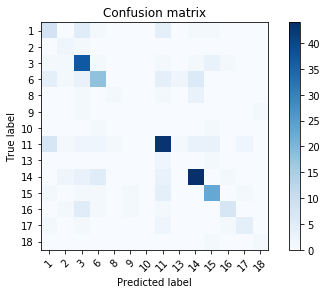

In [10]:
#confusion matrix hasil prediksi
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_test, predict)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

plt.show()